# PHILOSOPHY NETWORKS:
## Extraction of Sentence-Co-Occurring Relationships among Concepts 
# Karl Marx and Friedrich Engels' The Communist Manifesto

In [1]:
import nltk
import os
import re
import csv
import itertools
%matplotlib inline 
%load_ext autoreload
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import numpy as np
import pickle
from utils import *
import community
import operator
import tools as tool
import math
from chAs import draw_comms,modul_arity
from nltk.tokenize import sent_tokenize, word_tokenize

# from nltk.tag.stanford import StanfordNERTagger

# java_path = "C:/Program Files/Java/jdk1.8.0_05/bin/java.exe"
# os.environ['JAVAHOME'] = java_path
# path2 = 'C:/Users/Pantelis/Desktop/NOTEBOOK/stanfordner'
# st =  StanfordNERTagger(path2+'/classifiers/english.all.3class.distsim.crf.ser.gz', 'stanford-ner.jar')

In [2]:
# st =  StanfordNERTagger('/Users/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/stanfordner/classifiers/english.all.3class.distsim.crf.ser.gz', '/Users/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/stanfordner/stanford-ner.jar')
# # st = StanfordNERTagger('classifiers/english.all.3class.distsim.crf.ser.gz','/home/sergios-len/Downloads/stanford-ner-2015-12-09/stanford-ner.jar')


# # f1 = open('Texts/Spinoza_Ethics.txt','r')

import codecs
f1 = codecs.open('Texts/Marx&Engels_TheCommunistManifesto.txt', "r", encoding="utf-8")
f1Temp = codecs.open("tempASCII", "w", encoding="ascii", errors="ignore")
f1Temp.write('Texts/Marx&Engels_TheCommunistManifesto.txt')
# f1 = codecs.open('Texts/Spinoza_Ethics.txt', "r", encoding="utf-8")
# f1Temp = codecs.open("tempASCII", "w", encoding="ascii", errors="ignore")
# f1Temp.write('Texts/Spinoza_EthicsNietzsche_ThusSpakeZarathustra.txt')

# # f2 = open('Texts/NER_Results.txt','w')
# # f3 = open('Texts/NER_PERSONS.txt','w')
# # f4 = open('Texts/NER_Unique_PERSONS.txt','w')
# # f5 = open('Texts/NER_LOCATIONS.txt','w')
# # f6 = open('Texts/ALL_DISTANCE_CASES.txt','w')
# # f7 = open('Texts/uniquenames.csv','w')

book=f1.read()
# persons =[]

# # Tagging of words with PERSON,LOCATION, ORGANISATION
# results2= st.tag(book.split())


# for name,entity in results2:
#     if entity == "PERSON":
#         if name not in persons:
#             persons.append(name)

# # dictionary with frequence of names

# persons1=[]
# for elem in persons:
#     persons1.append(elem.strip('.').strip('"').strip(','))
# for k in persons1:
#     if len(k) == 2:
#         persons1.remove(k)
# persons1.sort()

# temp= list(set(persons1))
# unique_persons_list = [s for s in temp if len(s) != 1]

# unique_persons_list.sort()

# # book.replace("Comtesse","Countess")
# # book.replace("Madame Ferraud","Countess Ferraud")
# # book.replace("M. Ferraud","Comte Ferraud")
# # book.replace("Monsieur Ferraud","Comte Ferraud")

# # book.replace("Mademoiselle","Mlle.")
# # book.replace("Mlle. de Cominges","Mlle. Blanche")
# # book.replace("Madame la General","Mdme. de Cominges")
# # book.replace("Comtesse","Mdme. de Cominges")
# # book.replace("Widow de Cominges","Mdme. de Cominges")

# sorted(unique_persons_list)

In [3]:
# book_in_paragraphs = book.split('\n\n')

# selection=1 #input("1. sentences\n 2. paragraph\n")
# if selection ==1:
#     ALL_sentences=sent_tokenize(book)
# else:
#     ALL_sentences=book_in_paragraphs

# combinations_persons = list(itertools.combinations(unique_persons_list,2))

# len_list = len(combinations_persons)

# couples =[]
# distances= []
# occurences = []
# list1 = []
# list2= []
# for i in range(1,len_list):
#     for j in ALL_sentences:
#         temp= list(combinations_persons[i])

#         out  = re.compile(str(temp[0])+'(.*?)'+str(temp[1]), re.DOTALL |  re.IGNORECASE).findall(j)
#         if out :
# #             if  len(out[0])<=2:
# #                 couples.append(str(temp[0])+' '+ str(temp[1]))
# #             else:
#             occurences.append(str(temp[0])+' '+ str(temp[1]))

#             distances.append(str(temp[0])+' '+ str(temp[1])+": distance = "+str(len(out[0])))

#         out2  = re.compile(str(temp[1])+'(.*?)'+str(temp[0]), re.DOTALL |  re.IGNORECASE).findall(j)
# #         f6.write( "\n Person1: "+ str(temp[1])+" to Person2: " +str(temp[0]) + "\n..............\n")
#         if out2 :
# #             if  len(out2[0])<=2:
# #                 couples.append(str(temp[1])+' '+ str(temp[0]))
# #             else:
#             occurences.append(str(temp[1])+' '+ str(temp[0]))

#             distances.append(str(temp[1])+' '+ str(temp[0])+": distance = "+str(len(out2[0])))

# print "--------------DISTANCES---------------"
# print distances
# print "--------------------------------------"


# # temp= list(set(couples))
# # unique_couples_list = [s for s in temp if len(s) != 1]
# # unique_couples_list.sort()

# # for k in unique_couples_list:
# #     whole_name=k.split(' ')
# #     temp1 = whole_name[1]+ " "+whole_name[0]
# #     if  temp1 in unique_couples_list:
# #         unique_couples_list.remove(temp1)

In [4]:
# print "-------------- Unique COUPLES-----------------"
# print unique_couples_list
# print "--------------------------------------"

In [5]:
###################################################################################   2

# for k in unique_couples_list:
#     whole_name=k.split(' ')
#     #print whole_name
#     #print whole_name[0]
#     #print whole_name[1]
#     temp =whole_name[0]+"--"+whole_name[1]
#     if whole_name[0] in unique_persons_list:
#         unique_persons_list.remove(whole_name[0])
#     if whole_name[1] in unique_persons_list:
#         unique_persons_list.remove(whole_name[1])
#     if temp in unique_persons_list:
#         unique_persons_list.remove(temp)
#     unique_persons_list.append(k)
#     book.replace(whole_name[0],k)
#     book.replace(whole_name[1],k)

# temp= list(set(unique_persons_list))
# unique_persons_list2 = [s for s in temp if len(s) != 1]
# unique_persons_list2.sort()


# print '--------- Unique  names 2------------'
# for k in unique_persons_list2:
#     print k

# print "-----------------------------------"

In [6]:
unique_persons_list2=[
"communism","proletarian","bourgeois","class","society","struggle","production","revolution",
    "feudal","property","private","public","power","State","work","socialism","industry",
    "Germany","France","reaction","labour","history","interest","exploit","commerce",
    "modern","force","economic","destroy","relation","antagonism","party",
    "freedom"
# "communism","proletarian","bourgeois","class","society","struggle","production","revolution",
#     "feudal","property","private","public","power","State","work","socialism","industry",
#     "German","French","reaction","labour","history","interest","exploit","commerce",
#     "modern","force","economic","destroy","relation","ruling","antagonism","party",
#     "freedom"
]
#"thing",
print  len(unique_persons_list2)

33


In [7]:
selection=1 #input("1. sentences\n 2. paragraph\n")

if selection ==1:
    ALL_sentences=sent_tokenize(book)
else:
    ALL_sentences=book_in_paragraphs

#ALL_sentences=sent_tokenize(book)
combinations_persons = list(itertools.combinations(unique_persons_list2,2))

len_list = len(combinations_persons)

couples =[]
distances= []
occurences = []
list1 = []
list2= []
for i in range(1,len_list):
    for j in ALL_sentences:
        temp= list(combinations_persons[i])

        out  = re.compile(str(temp[0])+'(.*?)'+str(temp[1]), re.DOTALL |  re.IGNORECASE).findall(j)
        if out :
#             if  len(out[0])<=2:
#                 couples.append(str(temp[0])+' '+ str(temp[1]))
#             else:
            occurences.append(str(temp[0])+' - '+ str(temp[1]))

            distances.append(str(temp[0])+' '+ str(temp[1])+": distance = "+str(len(out[0])))


        out2  = re.compile(str(temp[1])+'(.*?)'+str(temp[0]), re.DOTALL |  re.IGNORECASE).findall(j)
#         f6.write( "\n Person1: "+ str(temp[1])+" to Person2: " +str(temp[0]) + "\n..............\n")
        if out2 :
#             if  len(out2[0])<=2:
#                 couples.append(str(temp[1])+' '+ str(temp[0]))
#             else:
            occurences.append(str(temp[1])+' - '+ str(temp[0]))

            distances.append(str(temp[1])+' '+ str(temp[0])+": distance = "+str(len(out2[0])))


# #print ALL_sentences
# print "--------------DISTANCES---------------"
# print distances
# print "--------------------------------------"

# print "--------------occurences-----------------"
# print occurences
# print "--------------------------------------"

# temp= list(set(couples))
# unique_couples_list = [s for s in temp if len(s) != 1]
# unique_couples_list.sort()


# print "-------------- Unique COUPLES-----------------"
# print unique_couples_list
# print "--------------------------------------"


dict_occurences={}
for i in occurences:
    if i not in dict_occurences:
        dict_occurences[i] = 1
    else:
        dict_occurences[i] = dict_occurences[i]+1


# print '------ Number of co-occurences of 2 names--------------'

# for i in dict_occurences:
#     print i, dict_occurences[i]

# print "-----------------------------------"


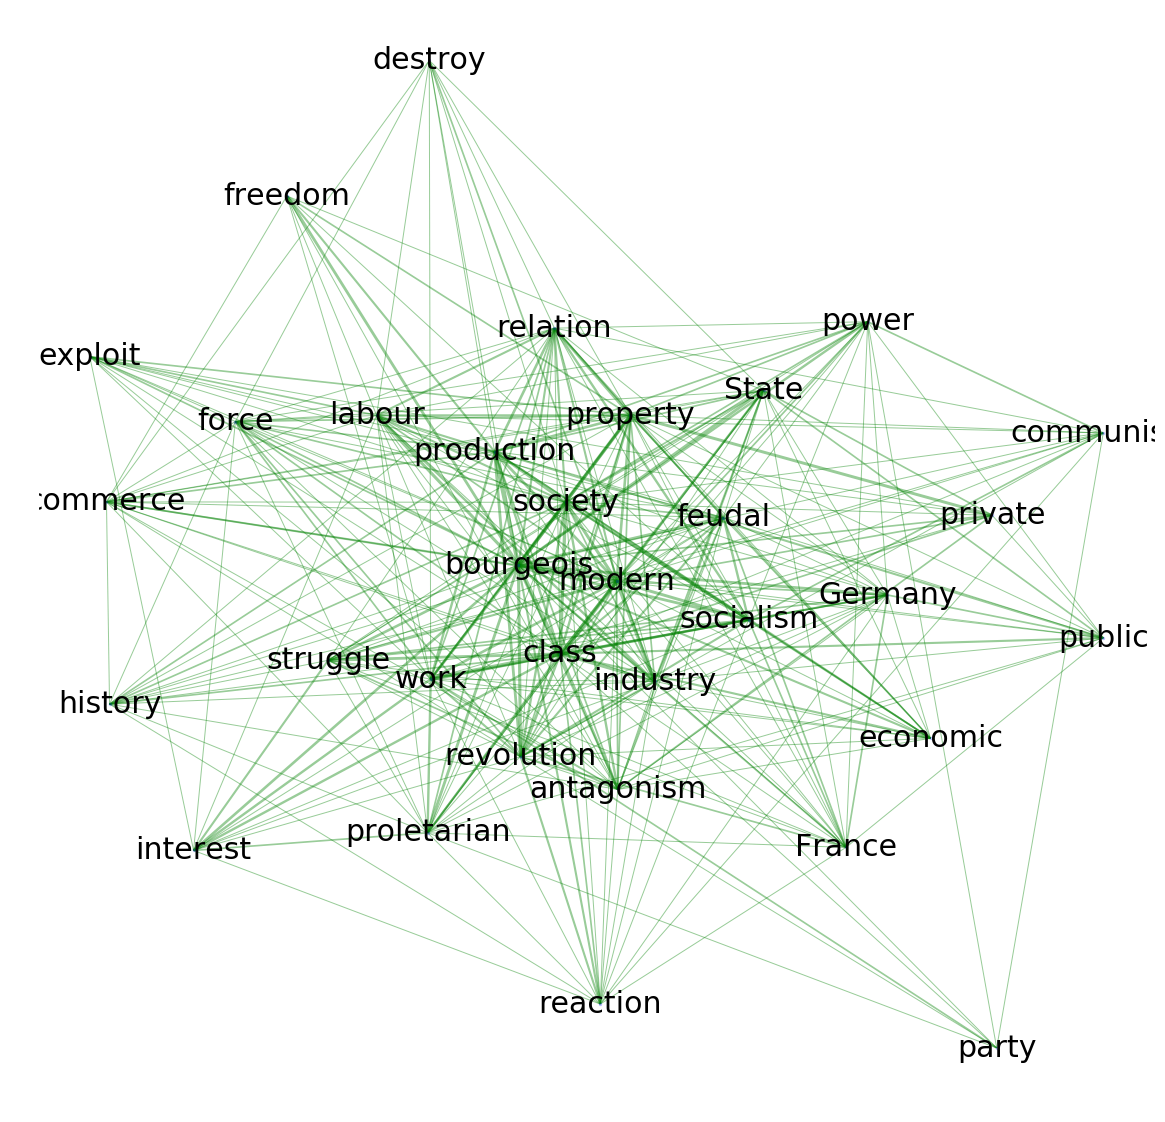

In [8]:
# %autoreload 2

G=nx.Graph()

for eds,wei in dict_occurences.items():
#     print ed,wei
    ed=eds.split(' - ')
    
    G.add_edge(ed[0],ed[1],weight=wei)
    G.add_node(ed[0],label=ed[0])
    G.add_node(ed[1],label=ed[1])
# print G.nodes(data=True)

edgewidth=[]
for (u,v,d) in G.edges(data=True):
    edgewidth.append(1+math.log(d['weight']))

labels={}
for i in G.nodes():
    labels[i]=i

plt.figure(figsize=(20,20))
pos=nx.spring_layout(G,scale=1.5,k=.5) #scale=1.5,k=.1
#,k=.15)) #,scale=5) #50) scale=2.5,k=.15
nx.draw_networkx_nodes(G,pos=pos,node_size=6,font_size=20,node_color='b',alpha=0.2); #with_labels=True,
nx.draw_networkx_edges(G,pos=pos,alpha=0.4,edge_color='g',width=edgewidth);
nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=30);
plt.axis('off');
plt.show()

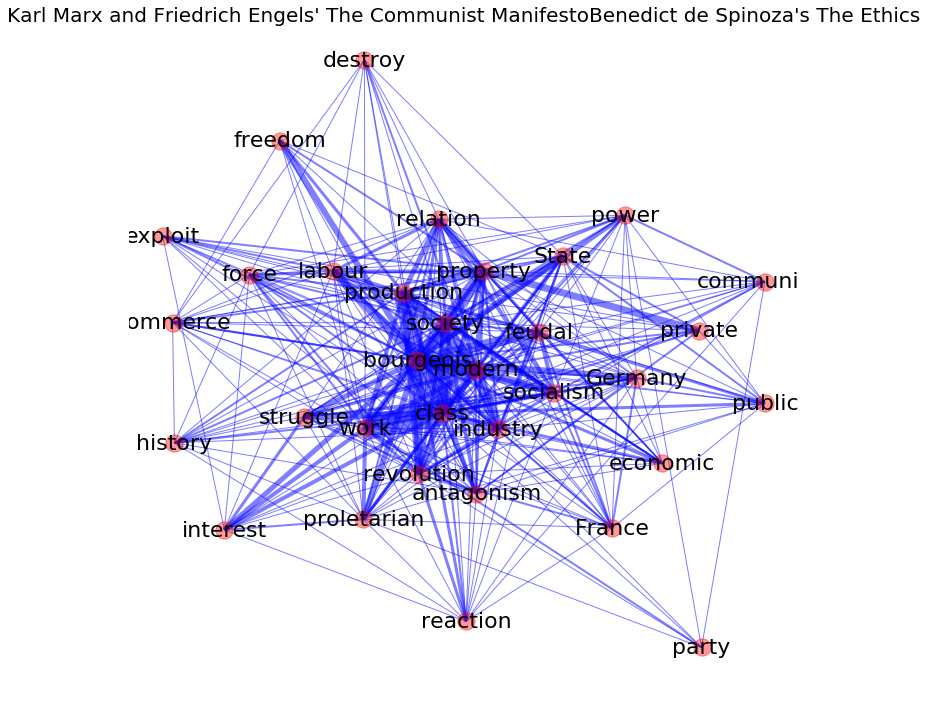

In [9]:
# pos=nx.spring_layout(G,scale=50,k=0.90,iterations=500)
sstt="Karl Marx and Friedrich Engels' The Communist ManifestoBenedict de Spinoza's The Ethics"
posit=draw_network(G,sstt,pos=pos,with_edgewidth=True,withLabels=True,labfs=22,valpha=0.1,ealpha=0.1,labelfont=15)


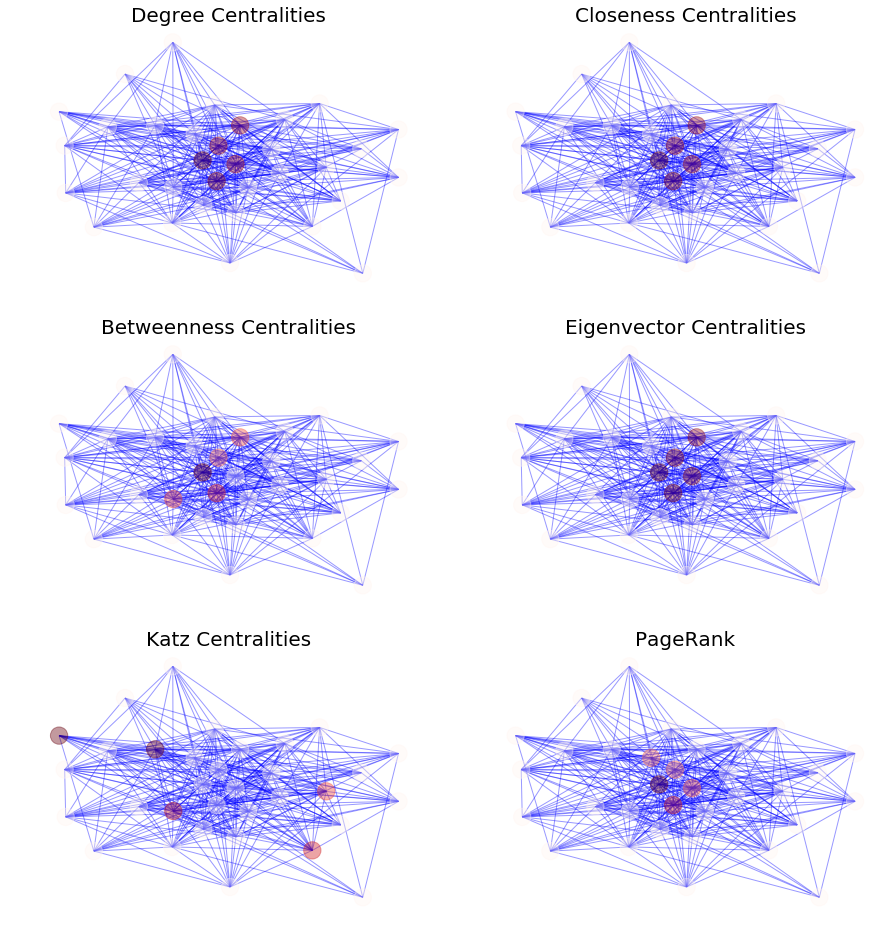

In [10]:
draw_centralities_subplots(G,pos,withLabels=False,labfs=5,figsi=(15,22))

In [11]:
partition = community.best_partition(G)
kk=len(set(partition.values()))
print 'The graph has', kk, 'communities'
cml=[]
for j in range(kk):
    cj=[]
    for k,v in partition.items():
        if v==j:
            cj.append(k)
    cml.append(cj)
cmd={}
for j in range(kk):
    cmd[tuple(cml[j])]=len(cml[j])
cmd
ocmd=sorted(cmd.iteritems(), key=operator.itemgetter(1), reverse=True)
eocmd=enumerate(ocmd)
for i in eocmd:
    print 'Community', i[0], 'with', i[1][1], 'nodes:', i[1][0]

The graph has 3 communities
Community 0 with 14 nodes: ('force', 'modern', 'private', 'society', 'exploit', 'relation', 'commerce', 'destroy', 'labour', 'antagonism', 'industry', 'State', 'property', 'history')
Community 1 with 13 nodes: ('revolution', 'France', 'economic', 'feudal', 'communism', 'production', 'Germany', 'public', 'power', 'bourgeois', 'reaction', 'freedom', 'socialism')
Community 2 with 6 nodes: ('proletarian', 'interest', 'struggle', 'party', 'class', 'work')


[(1.0, 0.0, 0.0, 1.0), (1.0, 0.50196078431372548, 0.0, 1.0), (1.0, 1.0, 0.0, 1.0)]


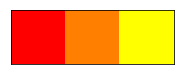

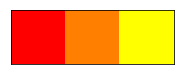

In [12]:
def show_colors(colors):
    """
    Draw a square for each color contained in the colors list
    given in argument.
    """
    with plt.rc_context(plt.rcParamsDefault):
        fig = plt.figure(figsize=(6, 1), frameon=False)
        ax = fig.add_subplot(111)
        for x, color in enumerate(colors):
            ax.add_patch(
                mpl.patches.Rectangle(
                    (x, 0), 1, 1, facecolor=color
                )
            )
        ax.set_xlim((0, len(colors)))
        ax.set_ylim((0, 1))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_aspect("equal")
    
    return fig

minima = min(partition.values())
maxima = max(partition.values())
norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.autumn) #tab10) #Set3 Pastel2) #Greys_r)
colors=[]
for v in partition.values():
    c=mapper.to_rgba(v)
    if c not in colors:
        colors.append(c)
print colors
show_colors(colors)

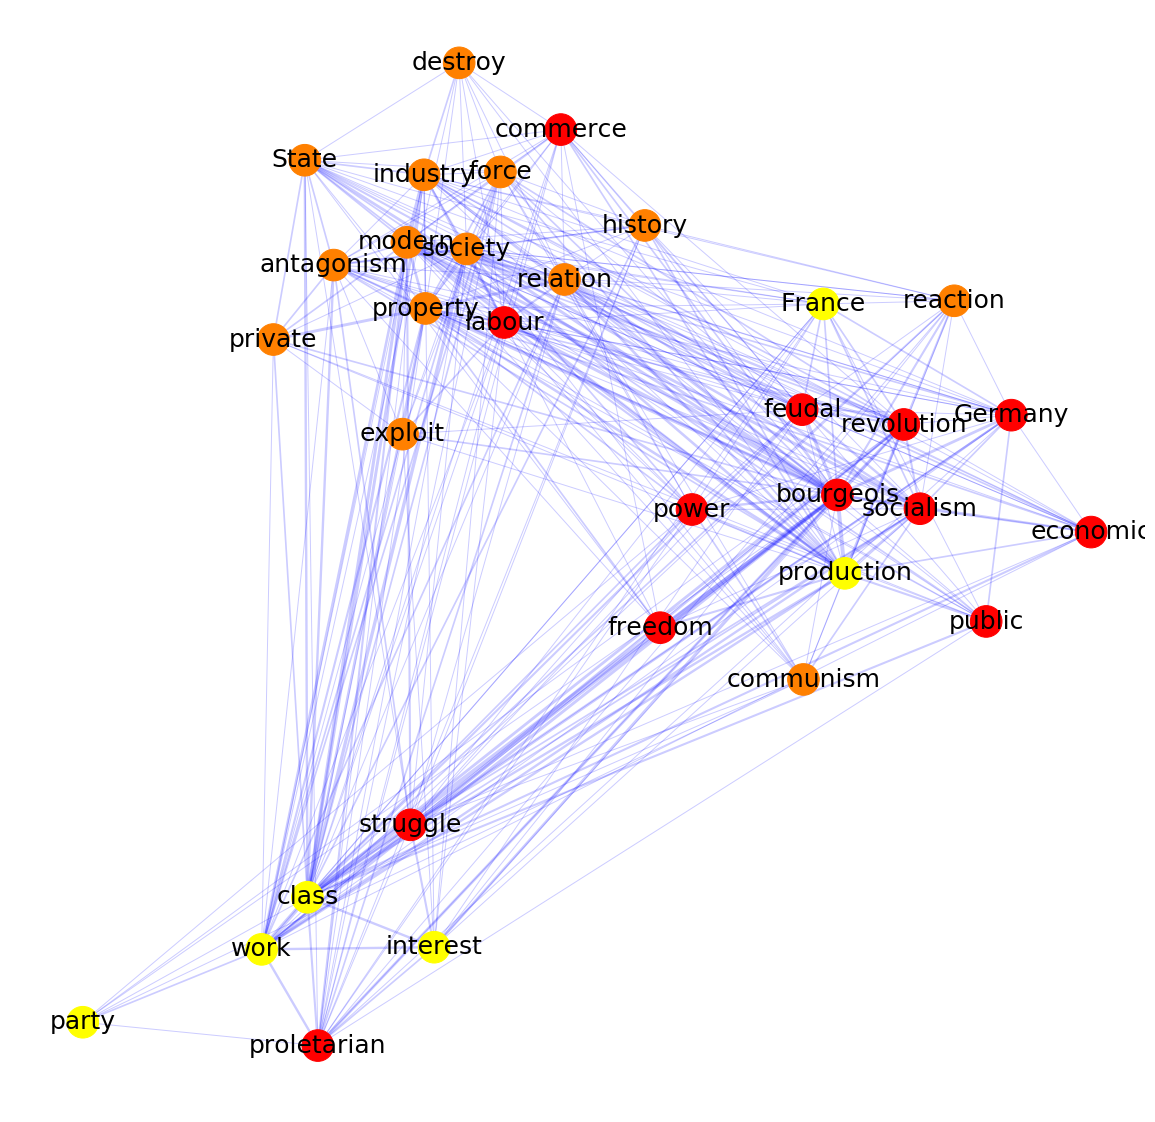

In [13]:
partition = community.best_partition(G)

ppartition=dict()
for k,v in partition.items():
    c=mapper.to_rgba(v)
    ppartition[k]=c
        
plt.figure(figsize=(20,20))
pos = tool.community_layout(G, partition)
color_map = []
edgewidth=[]
for (u,v,d) in G.edges(data=True):
    edgewidth.append(1+math.log(d['weight']))
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,node_color=ppartition.values(),node_size=1000,font_size=20,alpha=1.)
#  ["y","c","orange"]
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth,alpha=0.2);
nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=25);
plt.axis('off');
plt.show()

In [14]:
cmms=[]
for i in cmd.keys():
    cmms.append(list(i))

ppartition0=dict()
for k,v in ppartition.items():
    if k in cmms[0]:
        ppartition0[k]=v
ppartition1=dict()
for k,v in ppartition.items():
    if k in cmms[1]:
        ppartition1[k]=v
ppartition2=dict()
for k,v in ppartition.items():
    if k in cmms[2]:
        ppartition2[k]=v
# ppartition3=dict()
# for k,v in ppartition.items():
#     if k in cmms[3]:
#         ppartition3[k]=v

pos=nx.circular_layout(nx.cycle_graph(len(cmms)))

G0=G.subgraph(cmms[0])
pos0=nx.circular_layout(G0)
G1=G.subgraph(cmms[1])
pos1=nx.circular_layout(G1)
G2=G.subgraph(cmms[2])
pos2=nx.circular_layout(G2)
# G3=G.subgraph(cmms[3])
# pos3=nx.circular_layout(G3)

centers=pos.values()
centerm=[]
for i in range(len(centers)):
    t=[]
    for j in centers[i]:
        t.append(j*3)
    centerm.append(np.array(t))
centers=centerm
radius=2.5 #1.5

def re_pos(pos,centre,radius):
    plist=[list(v) for v in pos.values()]
    nplist=[v for v in pos.values()]
    x = [p[0] for p in plist]
    y = [p[1] for p in plist]
    centroid = (sum(x) / float(len(plist)), sum(y) / float(len(plist)))
    ncentroid=np.array(centroid)
    rad=max([np.linalg.norm(nplist[i]-ncentroid) for i in range(len(nplist))])
    rpos={}
    for k,v in pos.items():
        rpos[k]=[(v[0]+centre[0])/float(radius),(v[1]+centre[1])/float(radius)]
    return rpos

pos0=re_pos(pos0,centers[0],radius*1.7)
pos1=re_pos(pos1,centers[1],radius)
pos2=re_pos(pos2,centers[2],radius)
# pos3=re_pos(pos3,centers[3],radius)

posAll=dict(pos0.items()+pos1.items()+pos2.items()+[(k,pos0[k]+pos1[k]+pos2[k]) for k in set(pos2)&set(pos1)&set(pos0)])
# dict(pos0.items()+pos1.items()+pos2.items()+pos3.items()+[(k,pos0[k]+pos1[k]+pos2[k]+pos3[k]) for k in set(pos3)&set(pos2)&set(pos1)&set(pos0)])

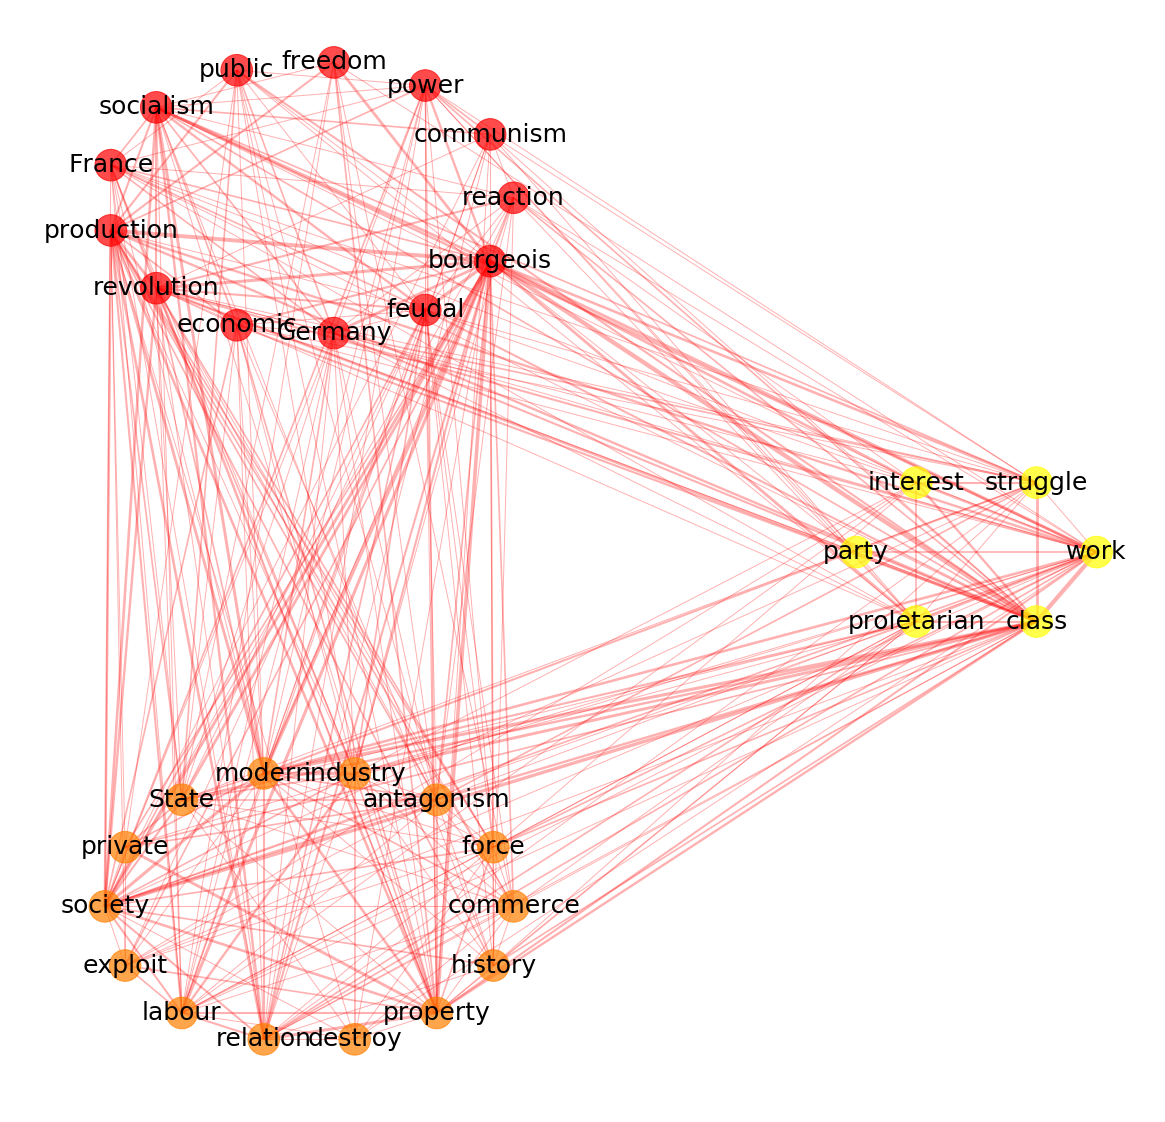

In [15]:
plt.figure(figsize=(20,20))

# edgewidth=[]
# for (u,v,d) in G.edges(data=True):
#     edgewidth.append(1+math.log(d['weight']))

nx.draw_networkx_nodes(G0,pos=pos0,node_size=1000,nodelist=cmms[0],node_color=ppartition0.values(),font_size=20,alpha=0.7);
nx.draw_networkx_nodes(G1,pos=pos1,node_size=1000,nodelist=cmms[1],node_color=ppartition1.values(),font_size=20,alpha=0.7);
nx.draw_networkx_nodes(G2,pos=pos2,node_size=1000,nodelist=cmms[2],node_color=ppartition2.values(),font_size=20,alpha=0.7);
# nx.draw_networkx_nodes(G3,pos=pos3,node_size=1000,nodelist=cmms[3],node_color=ppartition3.values(),font_size=20,alpha=0.7);

# nx.draw_networkx_nodes(G,pos=pos,with_labels=False,node_color=ppartition.values(),node_size=1000,font_size=20,alpha=1.)
# #  ["y","c","orange"]

nx.draw_networkx_edges(G,posAll,edge_color='r',width=edgewidth,alpha=0.3);
nx.draw_networkx_labels(G,posAll,labels=labels,font_size=25);

# nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth,alpha=0.2);
# nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=25);

plt.axis('off');
plt.show()

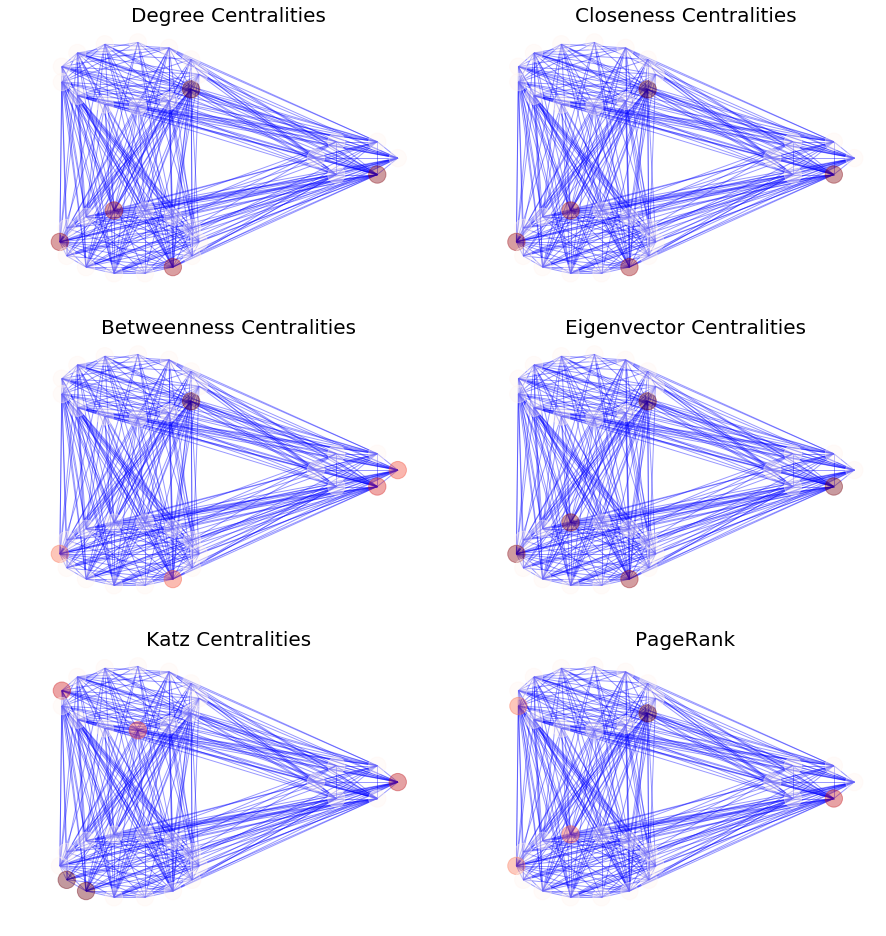

In [16]:
draw_centralities_subplots(G,posAll,withLabels=False,labfs=5,figsi=(15,22))

Number of communities of Karl Marx and Friedrich Engels' The Communist ManifestoBenedict de Spinoza's The Ethics = 3
Community partition of Karl Marx and Friedrich Engels' The Communist ManifestoBenedict de Spinoza's The Ethics:
[['revolution', 'France', 'economic', 'feudal', 'communism', 'production', 'Germany', 'public', 'power', 'bourgeois', 'reaction', 'freedom', 'socialism'], ['force', 'modern', 'private', 'society', 'exploit', 'relation', 'commerce', 'destroy', 'labour', 'antagonism', 'industry', 'State', 'property', 'history'], ['proletarian', 'interest', 'struggle', 'party', 'class', 'work']]
Community modularity of Karl Marx and Friedrich Engels' The Communist ManifestoBenedict de Spinoza's The Ethics = 0.0894


/Users/mosesboudourides/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


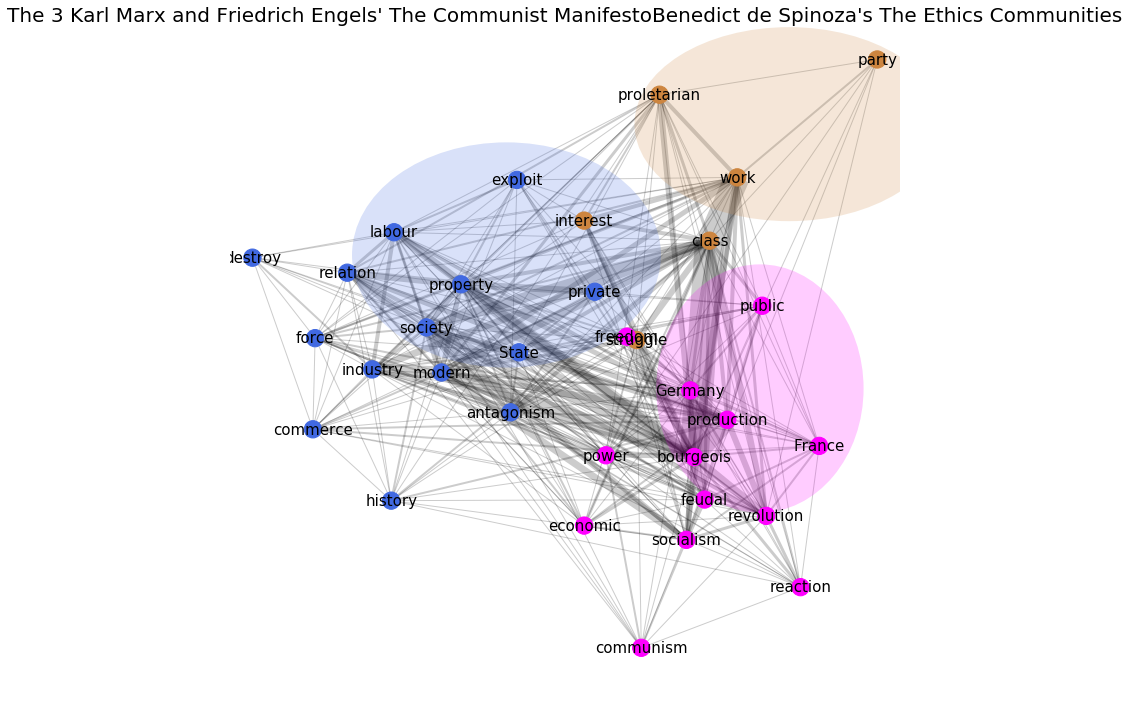

In [17]:
part=community.best_partition(G)  #comm.best_partition(G) 
print 'Number of communities of %s = %i' %(sstt, max(part.values())+1)
print 'Community partition of %s:' %(sstt)
parLis=[]
partdi={}
for i,k in part.items():
    if k not in partdi:
        partdi[k]=[i]
    else:
        partdi[k].append(i)
for i,k in partdi.items():
    parLis.append(k)
print parLis
nodper={i:i for i in G.nodes()}
print 'Community modularity of %s = %.4f' %(sstt, community.modularity(part,G))  #comm.modularity(part,G))

d=0.8 
dd=0.8
c=1.2
cc=1.4
alpha=0.2
ealpha=.2
vcc={}
sstta="The %s %s Communities" %(max(part.values())+1,sstt)

draw_comms(G,G.nodes(),[],[],[] ,part,part,d,dd,c,cc,alpha,ealpha,nodper,sstta,titlefont=20,labelfont=15)